In [1]:
import bball

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img_shape = (224, 224)
start_img = 10
num_in_images = 1
num_out_images = 1
batch_size = 1
datadir = '/usr/share/vid/content/content/'

In [5]:
m, inp, outp = bball.get_network(num_in_images, num_out_images)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 224, 224, 64)  49216       input_1[0][0]                    
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 224, 224, 64)  256         convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 224, 224, 64)  0           batchnormalization_1[0][0]       
___________________________________________________________________________________________

In [6]:
xyflow = bball.get_flows(datadir, (start_img, start_img + num_in_images - 1),
                                (start_img + num_in_images,
                                 start_img + num_in_images + num_out_images - 1))


In [7]:
targ = np.zeros((batch_size, 128))

In [8]:
(x, y) = next(xyflow)

In [14]:
m.optimizer.lr = 0.001
m.fit([x.reshape((1, ) + x.shape),
               y.reshape((1, ) + y.shape)], targ, 1, 100)

Epoch 1/100
1/1 [==============================] - 0s - loss: 319822.1875
Epoch 2/100
1/1 [==============================] - 0s - loss: 319763.2188
Epoch 3/100
1/1 [==============================] - 0s - loss: 319672.7500
Epoch 4/100
1/1 [==============================] - 0s - loss: 319577.7500
Epoch 5/100
1/1 [==============================] - 0s - loss: 319564.3750
Epoch 6/100
1/1 [==============================] - 0s - loss: 319570.4375
Epoch 7/100
1/1 [==============================] - 0s - loss: 319657.0000
Epoch 8/100
1/1 [==============================] - 0s - loss: 319876.9688
Epoch 9/100
1/1 [==============================] - 0s - loss: 320231.9375
Epoch 10/100
1/1 [==============================] - 0s - loss: 319926.3750
Epoch 11/100
1/1 [==============================] - 0s - loss: 319534.8750
Epoch 12/100
1/1 [==============================] - 0s - loss: 319713.3125
Epoch 13/100
1/1 [==============================] - 0s - loss: 319951.0625
Epoch 14/100
1/1 [================

In [15]:
top_model = Model(inp, outp)

In [16]:
p = top_model.predict(x.reshape((1, ) + x.shape))

In [17]:
p.shape

(1, 224, 224, 3)

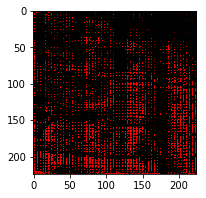

In [18]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.imshow(p[0])

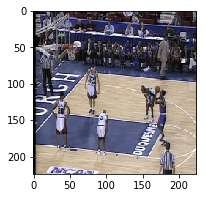

In [19]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.imshow(y)

In [27]:
count = 10

In [29]:
for (x, y) in xyflow:
    m.fit([x.reshape((1, ) + x.shape),
           y.reshape((1, ) + y.shape)], targ, 1, 20)
    count -= 1
    if count == 0:
        break

Epoch 1/20
1/1 [==============================] - 0s - loss: 299464.3750
Epoch 2/20
1/1 [==============================] - 0s - loss: 290179.9062
Epoch 3/20
1/1 [==============================] - 0s - loss: 284654.1250
Epoch 4/20
1/1 [==============================] - 0s - loss: 277889.0625
Epoch 5/20
1/1 [==============================] - 0s - loss: 277313.8438
Epoch 6/20
1/1 [==============================] - 0s - loss: 267833.4375
Epoch 7/20
1/1 [==============================] - 0s - loss: 268283.2812
Epoch 8/20
1/1 [==============================] - 0s - loss: 261967.3438
Epoch 9/20
1/1 [==============================] - 0s - loss: 259747.2031
Epoch 10/20
1/1 [==============================] - 0s - loss: 257894.8438
Epoch 11/20
1/1 [==============================] - 0s - loss: 253647.3125
Epoch 12/20
1/1 [==============================] - 0s - loss: 253994.1719
Epoch 13/20
1/1 [==============================] - 0s - loss: 250680.8750
Epoch 14/20
1/1 [==============================

In [30]:
(x, y) = next(xyflow)

In [31]:
p = top_model.predict(x.reshape((1, ) + x.shape))

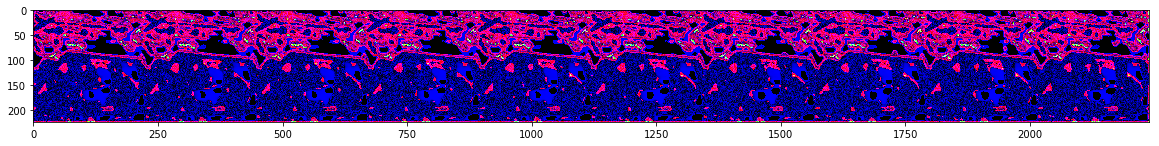

In [32]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.imshow(p[0])

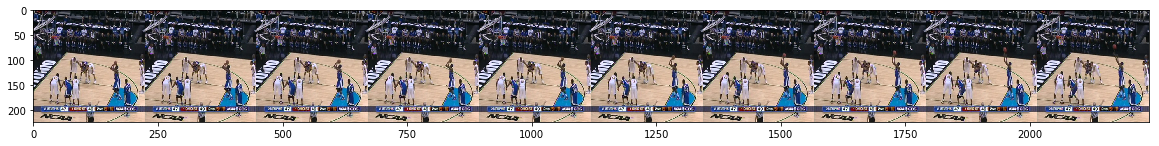

In [35]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.imshow(x)

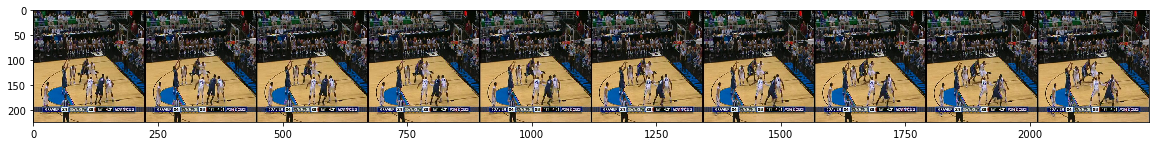

In [57]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.imshow(y)

In [41]:
m.optimizer.lr = 0.01
m.fit([x.reshape((1, ) + x.shape),
        y.reshape((1, ) + y.shape)], targ, 1, 40)

Epoch 1/40
1/1 [==============================] - 0s - loss: 243900.1094
Epoch 2/40
1/1 [==============================] - 0s - loss: 242500.2500
Epoch 3/40
1/1 [==============================] - 0s - loss: 242421.7812
Epoch 4/40
1/1 [==============================] - 0s - loss: 241195.5156
Epoch 5/40
1/1 [==============================] - 0s - loss: 240966.8438
Epoch 6/40
1/1 [==============================] - 0s - loss: 240345.8438
Epoch 7/40
1/1 [==============================] - 0s - loss: 239265.9688
Epoch 8/40
1/1 [==============================] - 0s - loss: 239004.9531
Epoch 9/40
1/1 [==============================] - 0s - loss: 238047.3125
Epoch 10/40
1/1 [==============================] - 0s - loss: 237080.9375
Epoch 11/40
1/1 [==============================] - 0s - loss: 235936.5938
Epoch 12/40
1/1 [==============================] - 0s - loss: 234377.6875
Epoch 13/40
1/1 [==============================] - 0s - loss: 232751.7188
Epoch 14/40
1/1 [==============================

In [42]:
p = top_model.predict(x.reshape((1, ) + x.shape))

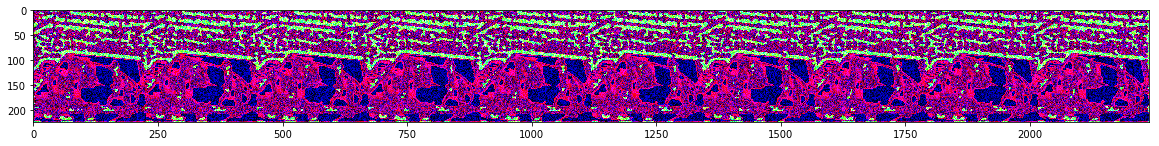

In [43]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.imshow(p[0])

In [49]:
m.optimizer.lr = 0.001
m.fit([x.reshape((1, ) + x.shape),
        y.reshape((1, ) + y.shape)], targ, 1, 40)

Epoch 1/40
1/1 [==============================] - 0s - loss: 108940.4844
Epoch 2/40
1/1 [==============================] - 0s - loss: 108401.0781
Epoch 3/40
1/1 [==============================] - 0s - loss: 107741.0156
Epoch 4/40
1/1 [==============================] - 0s - loss: 107194.8047
Epoch 5/40
1/1 [==============================] - 0s - loss: 106647.2188
Epoch 6/40
1/1 [==============================] - 0s - loss: 106085.8438
Epoch 7/40
1/1 [==============================] - 0s - loss: 105627.4688
Epoch 8/40
1/1 [==============================] - 0s - loss: 105085.6484
Epoch 9/40
1/1 [==============================] - 0s - loss: 104568.4453
Epoch 10/40
1/1 [==============================] - 0s - loss: 104026.3359
Epoch 11/40
1/1 [==============================] - 0s - loss: 103582.1562
Epoch 12/40
1/1 [==============================] - 0s - loss: 103126.0781
Epoch 13/40
1/1 [==============================] - 0s - loss: 102670.9062
Epoch 14/40
1/1 [==============================

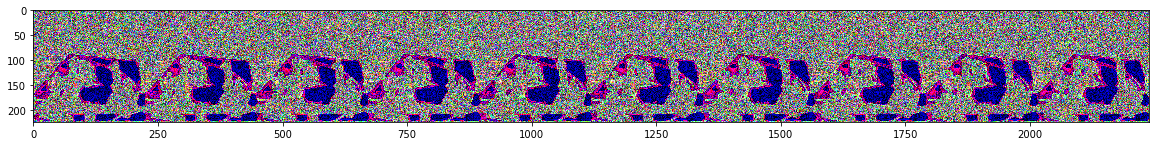

In [50]:
p = top_model.predict(x.reshape((1, ) + x.shape))
fig, ax = plt.subplots(figsize=(20, 3))
ax.imshow(p[0])

In [62]:
m.optimizer.lr = 0.001
m.fit([x.reshape((1, ) + x.shape),
        y.reshape((1, ) + y.shape)], targ, 1, 40)

Epoch 1/40
1/1 [==============================] - 0s - loss: 204530.1719
Epoch 2/40
1/1 [==============================] - 0s - loss: 176304.7188
Epoch 3/40
1/1 [==============================] - 0s - loss: 179126.3906
Epoch 4/40
1/1 [==============================] - 0s - loss: 174877.9219
Epoch 5/40
1/1 [==============================] - 0s - loss: 162070.7812
Epoch 6/40
1/1 [==============================] - 0s - loss: 175628.4062
Epoch 7/40
1/1 [==============================] - 0s - loss: 171726.5938
Epoch 8/40
1/1 [==============================] - 0s - loss: 175835.3125
Epoch 9/40
1/1 [==============================] - 0s - loss: 169438.0625
Epoch 10/40
1/1 [==============================] - 0s - loss: 170674.7500
Epoch 11/40
1/1 [==============================] - 0s - loss: 165477.4062
Epoch 12/40
1/1 [==============================] - 0s - loss: 167452.3438
Epoch 13/40
1/1 [==============================] - 0s - loss: 162030.9062
Epoch 14/40
1/1 [==============================

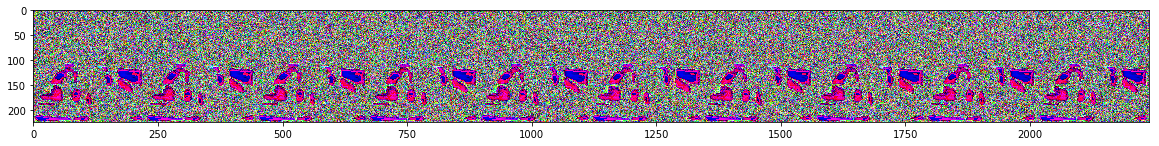

In [60]:
p = top_model.predict(x.reshape((1, ) + x.shape))
fig, ax = plt.subplots(figsize=(20, 3))
ax.imshow(p[0])

In [61]:
(x, y) = next(xyflow)